# Health Tracking System
## Análisis de Regresión

## Optimización Convexa - Mayo 2022

***Ashwin Bhat***

***Carlos Caloca Gomez***

***Daniel Lagunas Barba***

***Leonardo Razo Islas***

***Antonio Sepúveda Angulo***



**Introducción**

Los productores de carne de pollo tienen como objetivo, de manera muy general, convertir de manera más eficiente los granos que consumen sus aves en carne. Existen muchas métricas y variables que se evalúan durante el crecimiento del pollo como: 
-	Conversión alimenticia
-	Ganancia de peso diario
-	Mortandad
-	Mortalidad
-	Integridad Intestinal
-	Integridad Respiratoria
-	Incidencia de enfermades
-	Peso final

Todas ellas estas relacionadas entre sí y son utilizadas para verificar como crecen las parvadas y cual es la rentabilidad del negocio. La métrica de Integridad Intestinal es utilizada de manera subclínica para indicar cual es la calidad con la cual el pollo está procesando el alimento y si presenta alguna lesión interna que nos ayuda a identificar problemas de nutrición, bioseguridad y salud. Para obtener está métrica se requiere hacer un muestreo de al menos 5 aves por edad por caseta por parvada y realizar una necropsia detallada donde se revisan alrededor de 60 partes de órganos del ave, ingresarlas a un software llamado HTS y te dará 2 resultados: Integridad Intestinal e Integridad Respiratoria.


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [3]:
df_db_1435 = pd.read_excel('c:\Proyect\db_1419_all.xlsx',sheet_name='Sheet1')

In [4]:
# Se imprime los primeros 5 registro de la tabla 

df_db_1435.head(5)

,Aflt,Customer,PostingMonth,PostingYear,Age,AgePhase,Breed,Bird,a,AB,...,SX,TDS,TH,THY,TK,TN,TRA,TW,WC,I2
0,MX,716,November,2016,14,2,Arbor Acres,1,0.0,0,...,0,0,0,0,0,0,0,0,0,94
1,MX,716,November,2016,14,2,Arbor Acres,2,0.0,0,...,0,0,0,0,0,0,0,0,0,100
2,MX,716,November,2016,14,2,Arbor Acres,5,0.0,0,...,0,0,0,0,0,0,0,0,0,100
3,MX,716,November,2016,14,2,Arbor Acres,3,0.0,0,...,0,0,0,0,0,0,0,0,0,92
4,MX,716,November,2016,14,2,Arbor Acres,4,0.0,0,...,0,0,0,0,0,0,0,0,0,100


In [5]:
# Columnas

df_db_1435.columns

Index(['Aflt', 'Customer', 'PostingMonth', 'PostingYear', 'Age', 'AgePhase',
       'Breed', 'Bird', 'a', 'AB', 'AC', 'AP', 'Ars', 'b', 'BDM', 'BF', 'BL',
       'BOW', 'BOX', 'BSM', 'BTL', 'Bur', 'BUW', 'CCS', 'Cdv', 'CFM', 'CL',
       'Clr', 'CM', 'CS', 'DC', 'FH', 'FP', 'gAC', 'gBR', 'Giz', 'gMI', 'gMx',
       'gNX', 'gTN', 'GUL', 'GUW', 'HK', 'HY', 'IH', 'IP', 'IT', 'L', 'LE',
       'MC', 'ML', 'mMX', 'NE', 'OM', 'PL', 'PRV', 'RI', 'RKT', 'RW', 'RY',
       'SC', 'SH', 'SPW', 'SX', 'TDS', 'TH', 'THY', 'TK', 'TN', 'TRA', 'TW',
       'WC', 'I2'],
      dtype='object')

In [6]:
# Remover las columnas de integridad respratoria, para dejar exclusivamente las lesiones de Integridad Intestinal

df_db_1435.drop(['Ars','AP','TRA','RI'],axis=1,inplace=True)

In [7]:
df_db_1435.columns

Index(['Aflt', 'Customer', 'PostingMonth', 'PostingYear', 'Age', 'AgePhase',
       'Breed', 'Bird', 'a', 'AB', 'AC', 'b', 'BDM', 'BF', 'BL', 'BOW', 'BOX',
       'BSM', 'BTL', 'Bur', 'BUW', 'CCS', 'Cdv', 'CFM', 'CL', 'Clr', 'CM',
       'CS', 'DC', 'FH', 'FP', 'gAC', 'gBR', 'Giz', 'gMI', 'gMx', 'gNX', 'gTN',
       'GUL', 'GUW', 'HK', 'HY', 'IH', 'IP', 'IT', 'L', 'LE', 'MC', 'ML',
       'mMX', 'NE', 'OM', 'PL', 'PRV', 'RKT', 'RW', 'RY', 'SC', 'SH', 'SPW',
       'SX', 'TDS', 'TH', 'THY', 'TK', 'TN', 'TW', 'WC', 'I2'],
      dtype='object')

In [8]:
# Se revisan los tipos de datos, solo para verificar que no estuvieran como strings

df_db_1435.dtypes

Aflt            object
Customer         int64
PostingMonth    object
PostingYear      int64
Age              int64
                 ...  
TK               int64
TN               int64
TW               int64
WC               int64
I2               int64
Length: 69, dtype: object

In [9]:
# Se hace el objeto para entrenar el modelo de regresion multlinear y el split de test y train

lr_multple=linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(df_db_1435.iloc[:,8:-1],df_db_1435.iloc[:,-1],test_size=0.2)

lr_multple.fit(x_train,y_train)

LinearRegression()

In [10]:
# Se genera la prediccion 

y_predict=lr_multple.predict(x_test)

In [11]:
print('valor de los coeficientes')
print(lr_multple.coef_,'\n')

print('valor del intercepto')
print(lr_multple.intercept_,'\n')

print('score del entrenamiento')
print(lr_multple.score(x_train,y_train),'\n')

print('score del test')
print(lr_multple.score(x_test,y_test))

valor de los coeficientes
[-1.98546621e-14  4.28303226e-14 -7.57865992e-14  4.66293670e-15
  6.97220059e-14 -1.77635684e-14 -1.00000000e+00 -2.22044605e-16
  1.11022302e-15  1.55431223e-15  1.53121960e-12  4.70734562e-14
 -7.10542736e-15  9.76996262e-15 -9.28146449e-14  5.32240918e-12
 -1.06581410e-14 -7.54951657e-15 -2.22044605e-15 -3.00000000e+00
  3.07864845e-13 -1.57207580e-13 -2.00000000e+00 -3.00000000e+00
 -1.33226763e-15 -3.00000000e+00 -2.00000000e+00 -5.00000000e+00
  3.10862447e-15 -2.00000000e+00 -5.55111512e-16  0.00000000e+00
 -2.89546165e-13 -5.00000000e+00 -1.00000000e+00 -9.63673585e-14
 -2.00000000e+00 -7.05879799e-13 -4.00790512e-14 -3.00000000e+00
 -2.00000000e+00 -3.55271368e-15 -5.00000000e+01 -8.31112956e-13
  0.00000000e+00 -3.00000000e+00  2.74891221e-13  0.00000000e+00
  9.32587341e-15  6.25055563e-14 -5.12478948e-13  0.00000000e+00
  7.54396545e-14  5.91748872e-14 -3.00000000e+00 -9.21485110e-15
 -3.00000000e+00  2.86881630e-13 -1.00000000e+00 -2.00000000e+00

In [12]:
# Valoracion con maximo daño

lr_multple.predict(np.array(df_db_1435.iloc[:,8:-1].max()).reshape(1,-1))

array([-40.])

In [13]:
# Valoracion con minimo daño , lo cual hace sentido porque todos los pollos inician con calificacion de 100

lr_multple.predict(np.array(df_db_1435.iloc[:,8:-1].min()).reshape(1,-1))

array([100.])

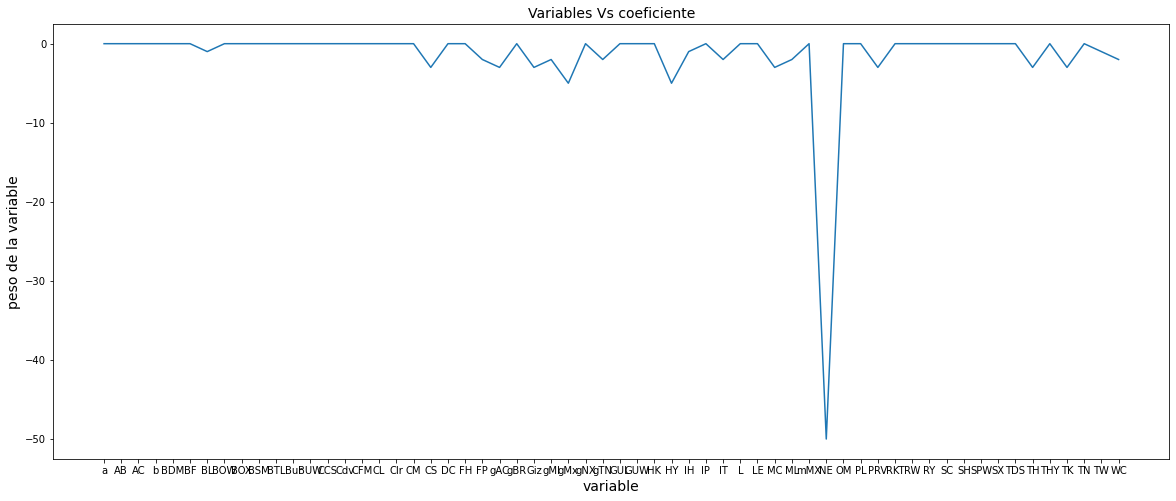

In [14]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(df_db_1435.columns[8:-1],lr_multple.coef_)
plt.title('Variables Vs coeficiente', fontsize=14)
plt.xlabel('variable', fontsize=14)
plt.ylabel('peso de la variable', fontsize=14)
#plt.grid(True)
plt.show()

In [15]:
# Se buscan las variables con poco peso

col_name=np.array(df_db_1435.iloc[:,8:-1].columns.tolist())     
var_less_weight = col_name[abs(lr_multple.coef_)< 0.01]
var_less_weight

array(['a', 'AB', 'AC', 'b', 'BDM', 'BF', 'BOW', 'BOX', 'BSM', 'BTL',
       'Bur', 'BUW', 'CCS', 'Cdv', 'CFM', 'CL', 'Clr', 'CM', 'DC', 'FH',
       'gBR', 'gNX', 'GUL', 'GUW', 'HK', 'IP', 'L', 'LE', 'mMX', 'OM',
       'PL', 'RKT', 'RW', 'RY', 'SC', 'SH', 'SPW', 'SX', 'TDS', 'THY',
       'TN'], dtype='<U3')

In [16]:
# Se remueven las variables con poco peso

df_db_1435.drop(var_less_weight,axis=1, inplace=True)

In [17]:
df_db_1435.columns

Index(['Aflt', 'Customer', 'PostingMonth', 'PostingYear', 'Age', 'AgePhase',
       'Breed', 'Bird', 'BL', 'CS', 'FP', 'gAC', 'Giz', 'gMI', 'gMx', 'gTN',
       'HY', 'IH', 'IT', 'MC', 'ML', 'NE', 'PRV', 'TH', 'TK', 'TW', 'WC',
       'I2'],
      dtype='object')

In [18]:
# Se vuelve hacer el entrenamiento del modelo y el split test train

x_train,x_test,y_train,y_test = train_test_split(df_db_1435.iloc[:,8:-1],df_db_1435.iloc[:,-1],test_size=0.2)

lr_multple.fit(x_train,y_train)

LinearRegression()

In [19]:
print('valor de los coeficientes')
print(lr_multple.coef_,'\n')

print('valor del intercepto')
print(lr_multple.intercept_,'\n')

print('score del entrenamiento')
print(lr_multple.score(x_train,y_train),'\n')

print('score del test')
print(lr_multple.score(x_test,y_test))

valor de los coeficientes
[ -1.  -3.  -2.  -3.  -3.  -2.  -5.  -2.  -5.  -1.  -2.  -3.  -2. -50.
  -3.  -3.  -3.  -1.  -2.] 

valor del intercepto
100.0000000000001 

score del entrenamiento
1.0 

score del test
1.0


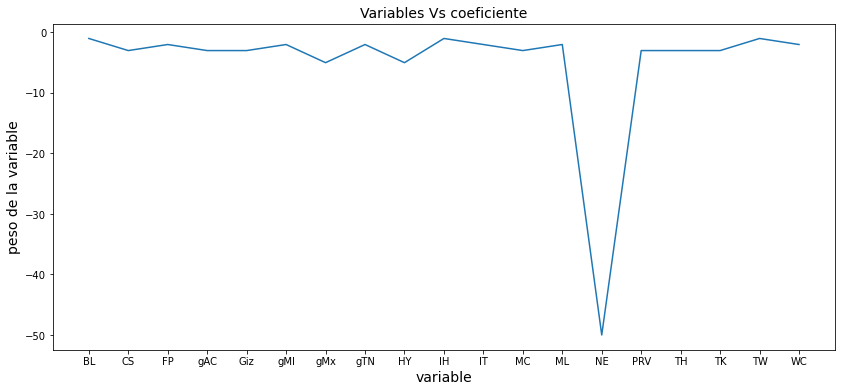

In [20]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(df_db_1435.columns[8:-1],lr_multple.coef_)
plt.title('Variables Vs coeficiente', fontsize=14)
plt.xlabel('variable', fontsize=14)
plt.ylabel('peso de la variable', fontsize=14)
#plt.grid(True)
plt.show()

In [21]:
# Variables y Coeficientes

pd.DataFrame([df_db_1435.columns[8:-1],lr_multple.coef_])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,BL,CS,FP,gAC,Giz,gMI,gMx,gTN,HY,IH,IT,MC,ML,NE,PRV,TH,TK,TW,WC
1,-1.0,-3.0,-2.0,-3.0,-3.0,-2.0,-5.0,-2.0,-5.0,-1.0,-2.0,-3.0,-2.0,-50.0,-3.0,-3.0,-3.0,-1.0,-2.0


In [22]:
# Errores 0_1
# Porque si no tiene erores el I2 sale diferente a 100

df_db_1435.iloc[:,8:][ (df_db_1435.iloc[:,8:-1].sum(axis=1)==0) & (df_db_1435.I2 == 100) ]

,BL,CS,FP,gAC,Giz,gMI,gMx,gTN,HY,IH,IT,MC,ML,NE,PRV,TH,TK,TW,WC,I2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100
27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100
28044,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100
28065,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100
28066,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100


In [23]:
df_db_1435.iloc[:,8:][ (df_db_1435.iloc[:,8:-1].sum(axis=1)==0) & (df_db_1435.I2 != 100) ]

,BL,CS,FP,gAC,Giz,gMI,gMx,gTN,HY,IH,IT,MC,ML,NE,PRV,TH,TK,TW,WC,I2


### Lasso Regression

In [28]:
# Se crea modelo nuevo

x_train,x_test,y_train,y_test = train_test_split(df_db_1435.iloc[:,8:-1],df_db_1435.iloc[:,-1],test_size=0.2)

param_grid = {'kernel': ['linear'], 'C':[1, 1.5, 2, 10],'epsilon':[0.2,0.5,0.3]}
svr = svm.SVR()
regr = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1.0, epsilon=0.3))
#regr = GridSearchCV(svr, param_grid)
regr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.3, kernel='linear'))])

In [30]:
# Se hace la predicción

y_pred = regr.predict(x_test)
print("score:", regr.score(x_test, y_test))

score: 0.9967733974952553


In [31]:
# Se calculan los errores

print("Explained Varainace Score:", explained_variance_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

Explained Varainace Score: 0.997847243303374
MAE : 0.29993045705936044
MSE : 0.08995829671026971
R2 score: 0.9967733974952553


In [32]:
# Se regulariza con Lasso

reg = linear_model.Lasso(alpha=0.03)
reg.fit(x_train,y_train )

print(reg.coef_)
print(reg.intercept_)
print("Regression with Lasso Regularisation train score:",reg.score(x_train,y_train))
print("Regression with Lasso Regularisation test score:",reg.score(x_test,y_test))

col_index = [index for index,x in enumerate(reg.coef_) if x.round(3) != 0]

"""
Lasso regression is used when we have useless variables, so we find the columns whose coefficients 
to get best score.

"""

df_db_1435.columns[col_index]

model = ''
for i in col_index:
    model = model + str(round(reg.coef_[i],3)) + str(df_db_1435.columns[i]) + ' '

print()
print()
print("The model based on Lasso regression is given as:")    
print(model, ' + ' ,str(reg.intercept_))

[-0.         -2.9028521  -1.59059148 -2.88608579 -2.98973968 -0.
 -4.80302318 -1.92831154 -4.86613427 -0.5726862  -1.74891044 -2.93590864
 -1.81995453 -0.         -2.90065412 -2.45398496 -2.44079515 -0.
 -1.77885897]
99.68262459596413
Regression with Lasso Regularisation train score: 0.9753946488818069
Regression with Lasso Regularisation test score: 0.9955188636304915


The model based on Lasso regression is given as:
-2.903Customer -1.591PostingMonth -2.886PostingYear -2.99Age -4.803Breed -1.928Bird -4.866BL -0.573CS -1.749FP -2.936gAC -1.82Giz -2.901gMx -2.454gTN -2.441HY -1.779IT   +  99.68262459596413


In [33]:
# Agregaremos Ridge al Lasso para crear una ElasticNet

reg = linear_model.ElasticNet(random_state=0)
reg.fit(x_train, y_train)
"""
Elastic Net is used to strink the variables having high correlation, it uses the benefits of both Lasso and Ridge Regression
"""
print(reg.coef_)
print(reg.intercept_)
print("Regression with Elastic Net Regularisation train score:",reg.score(x_train,y_train))
print("Regression with Elastic Net Regularisation test score:",reg.score(x_test,y_test))


# Testing score from 0.1 to 1

for i in np.arange(0,1,0.1):
    reg = linear_model.ElasticNet(l1_ratio=i)
    reg.fit(x_train, y_train)
    print(i, reg.score(x_test, y_test))
    
# We don't get good model with ELastic Net Regression, l1_ratio=1 results in Lasso and L1_ratio=0 results in Ridge

[-0.         -0.45191663 -0.         -0.39768538 -1.03616601 -0.
 -0.14687288 -0.2328039  -0.63362618 -0.         -0.         -0.57212776
 -0.         -0.         -0.1988842  -0.         -0.          0.
 -0.        ]
94.89945504039204
Regression with Elastic Net Regularisation train score: 0.24317357279407548
Regression with Elastic Net Regularisation test score: 0.2496333511351384
0.0 0.35509635617602286
0.1 0.3365018038233073
0.2 0.3152734811919822
0.30000000000000004 0.2942311957893893
0.4 0.27480759245850783
0.5 0.2496333511351384
0.6000000000000001 0.2161064250944591
0.7000000000000001 0.1854808692084512
0.8 0.15061890384300214
0.9 0.12115824721370949


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253814.34264708046, tolerance: 63.070099651810565
  model = cd_fast.enet_coordinate_descent(
